##### <center><h1><U> Customer Data Analysis</U></h1></center>

**1.Import necessary libraries**

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**2.Import dataset**

In [3]:
data = pd.read_csv('ecommerce_customer_data_large.csv')
data

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
249995,33807,2023-01-24 12:32:18,Home,436,1,3664,Cash,63,0.0,Gabriel Williams,63,Male,0
249996,20455,2021-06-04 05:45:25,Electronics,233,1,4374,Credit Card,66,1.0,Barry Foster,66,Female,0
249997,28055,2022-11-10 17:11:57,Electronics,441,5,5296,Cash,63,NaN,Lisa Johnson,63,Female,0
249998,15023,2021-06-27 14:42:12,Electronics,44,2,2517,Cash,64,1.0,Melissa Fernandez,64,Male,0


**3.To get the information of dataset**

In [4]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 13 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Customer ID            250000 non-null  int64  
 1   Purchase Date          250000 non-null  object 
 2   Product Category       250000 non-null  object 
 3   Product Price          250000 non-null  int64  
 4   Quantity               250000 non-null  int64  
 5   Total Purchase Amount  250000 non-null  int64  
 6   Payment Method         250000 non-null  object 
 7   Customer Age           250000 non-null  int64  
 8   Returns                202618 non-null  float64
 9   Customer Name          250000 non-null  object 
 10  Age                    250000 non-null  int64  
 11  Gender                 250000 non-null  object 
 12  Churn                  250000 non-null  int64  
dtypes: float64(1), int64(7), object(5)
memory usage: 24.8+ MB


**4. Statistical summary**

In [21]:
data.describe()

,Customer ID,Product Price,Quantity,Total Purchase Amount,Customer Age,Returns,Age,Churn
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,202618.000000,250000.000000,250000.00000
mean,25017.632092,254.742724,3.004936,2725.385196,43.798276,0.500824,43.798276,0.20052
std,14412.515718,141.738104,1.414737,1442.576095,15.364915,0.500001,15.364915,0.40039
min,1.000000,10.000000,1.000000,100.000000,18.000000,0.000000,18.000000,0.00000
25%,12590.000000,132.000000,2.000000,1476.000000,30.000000,0.000000,30.000000,0.00000
50%,25011.000000,255.000000,3.000000,2725.000000,44.000000,1.000000,44.000000,0.00000
75%,37441.250000,377.000000,4.000000,3975.000000,57.000000,1.000000,57.000000,0.00000
max,50000.000000,500.000000,5.000000,5350.000000,70.000000,1.000000,70.000000,1.00000


**5.Data cleaning**

In [5]:
print("Null values before dropna:\n", data.isnull().sum())

Null values before dropna:
 Customer ID                  0
Purchase Date                0
Product Category             0
Product Price                0
Quantity                     0
Total Purchase Amount        0
Payment Method               0
Customer Age                 0
Returns                  47382
Customer Name                0
Age                          0
Gender                       0
Churn                        0
dtype: int64


In [6]:
data_cleaned = data.dropna()

In [7]:
print("\nNull values after dropna:\n", data_cleaned.isnull().sum())


Null values after dropna:
 Customer ID              0
Purchase Date            0
Product Category         0
Product Price            0
Quantity                 0
Total Purchase Amount    0
Payment Method           0
Customer Age             0
Returns                  0
Customer Name            0
Age                      0
Gender                   0
Churn                    0
dtype: int64


In [8]:
print(f"\nNumber of rows before dropna: {data.shape[0]}")
print(f"Number of rows after dropna: {data_cleaned.shape[0]}")


Number of rows before dropna: 250000
Number of rows after dropna: 202618


In [9]:
new_data= data_cleaned .drop_duplicates()

In [28]:
new_data['Purchase Date'] = pd.to_datetime(new_data['Purchase Date'])

In [29]:
new_data['Year'] = new_data['Purchase Date'].dt.year

In [30]:
if 'Total Purchase' not in new_data.columns:
    new_data['Total Purchase'] = new_data['Quantity'] * new_data['Product Price']

In [31]:
new_data.head()

,Customer ID,Purchase Date,Product Category,Product Price,Quantity,Total Purchase Amount,Payment Method,Customer Age,Returns,Customer Name,Age,Gender,Churn,Year,Total Purchase
0,44605,2023-05-03 21:30:02,Home,177,1,2427,PayPal,31,1.0,John Rivera,31,Female,0,2023,177
1,44605,2021-05-16 13:57:44,Electronics,174,3,2448,PayPal,31,1.0,John Rivera,31,Female,0,2021,522
2,44605,2020-07-13 06:16:57,Books,413,1,2345,Credit Card,31,1.0,John Rivera,31,Female,0,2020,413
3,44605,2023-01-17 13:14:36,Electronics,396,3,937,Cash,31,0.0,John Rivera,31,Female,0,2023,1188
4,44605,2021-05-01 11:29:27,Books,259,4,2598,PayPal,31,1.0,John Rivera,31,Female,0,2021,1036


##### Top Customers

In [32]:
top_customers = new_data.groupby('Customer Name')['Total Purchase'].sum().sort_values(ascending=False).head(10)
top_customers

Customer Name
Michael Smith       75687
Michael Johnson     64332
Michael Brown       63753
James Smith         61008
John Johnson        59643
John Smith          56023
Michael Williams    54638
Matthew Smith       54464
Michael Jones       54285
Jennifer Smith      53393
Name: Total Purchase, dtype: int64

##### Popular Products

In [33]:
popular_products = new_data.groupby('Product Category')['Quantity'].sum().sort_values(ascending=False).head(10)
popular_products

Product Category
Clothing       153372
Home           152745
Electronics    152111
Books          151332
Name: Quantity, dtype: int64

##### Sales Trends

In [35]:
yearly_sales = new_data.groupby('Year')['Total Purchase'].sum()
yearly_sales

Year
2020    42205536
2021    41841335
2022    42078911
2023    29373714
Name: Total Purchase, dtype: int64

##### Data Visualization

**Top Customers Bar Plot**

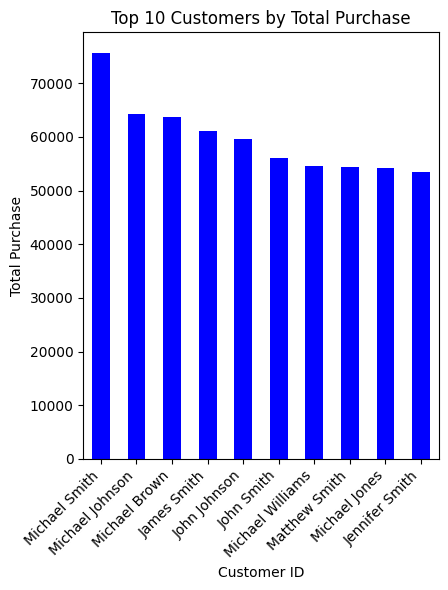

In [26]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
top_customers.plot(kind='bar', color='blue')
plt.title('Top 10 Customers by Total Purchase')
plt.xlabel('Customer ID')
plt.ylabel('Total Purchase')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()


 **Popular Products Bar Plot**

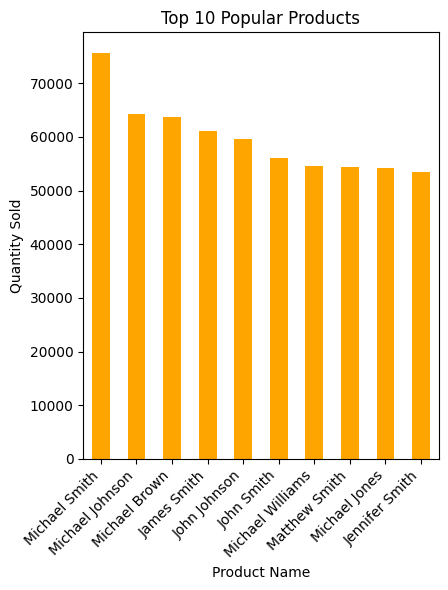

In [25]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 3, 1)
top_customers.plot(kind='bar', color='orange')
plt.title('Top 10 Popular Products')
plt.xlabel('Product Name')
plt.ylabel('Quantity Sold')
plt.xticks(rotation=45, ha='right')  
plt.tight_layout()
plt.show()

**Sales Trends Line Plot**

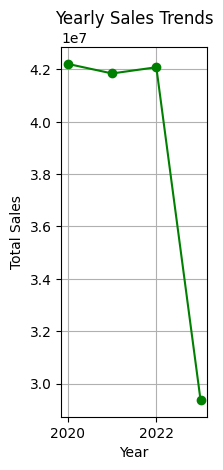

In [36]:
plt.subplot(1, 3, 3)
yearly_sales.plot(kind='line', marker='o', color='green')
plt.title('Yearly Sales Trends')
plt.xlabel('Year')
plt.ylabel('Total Sales')
plt.grid(True)

In [37]:
print("\nTop 10 Customers by Total Purchase:\n", top_customers)
print("\nTop 10 Popular Products by Quantity:\n", popular_products)
print("\nYearly Sales Trends:\n", yearly_sales)


Top 10 Customers by Total Purchase:
 Customer Name
Michael Smith       75687
Michael Johnson     64332
Michael Brown       63753
James Smith         61008
John Johnson        59643
John Smith          56023
Michael Williams    54638
Matthew Smith       54464
Michael Jones       54285
Jennifer Smith      53393
Name: Total Purchase, dtype: int64

Top 10 Popular Products by Quantity:
 Product Category
Clothing       153372
Home           152745
Electronics    152111
Books          151332
Name: Quantity, dtype: int64

Yearly Sales Trends:
 Year
2020    42205536
2021    41841335
2022    42078911
2023    29373714
Name: Total Purchase, dtype: int64


In [38]:
plt.savefig('top_customers.png')
plt.savefig('popular_products.png')
plt.savefig('yearly_sales_trends.png')

<Figure size 640x480 with 0 Axes>